# Data exploration

Load data parsed by `data/parse_requirements.py` and cleaned by `data/filter_requirements.py`.

In [6]:
import pandas as pd

# Load data
data_path = '/Users/kuba/git/work/package2vec_public/data/processed/requirements_cleaned.csv'
df = pd.read_csv(data_path)

The dataset consists of 56271 packages with 269440 dependencies in total. These dependencies constitute of 25204 unique packages - 'vocabulary' that we will use to train the models.

In [45]:
print('Number of entries in dataset: {}'.format(df.shape[0]))
print('Number of packages with stated dependencies: {}'.format(df['package'].unique().shape[0]))
print('Number of unique dependencies: {}'.format(len(df['dependency'].unique())))

Number of entries in dataset: 269440
Number of packages with stated dependencies: 56271
Number of unique dependencies: 25204


---

Most of the packages (cca 15k) have only one dependency and therefore carry no information for models we used.

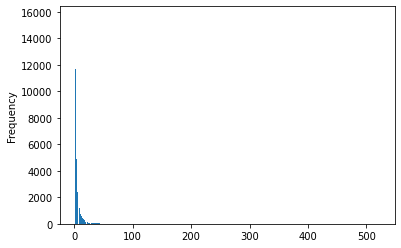

In [58]:
# number of dependencies per package
counts = df['package'].value_counts()

# histogram
counts.plot.hist(bins=600)

By filtering out packages with only one dependency, we get a smaller dataset.

In [86]:
# Use only packages with more then 1 dependencies
counts = df['package'].value_counts()
mask = df['package'].replace(counts)
df = df.loc[mask.ge(2)]

In [97]:
print('Number of entries in dataset: {}'.format(df.shape[0]))
print('Number of packages with stated dependencies: {}'.format(df['package'].unique().shape[0]))
print('Number of unique dependencies: {}'.format(len(df['dependency'].unique())))

Number of entries in dataset: 253802
Number of packages with stated dependencies: 40633
Number of unique dependencies: 24454


---
 Many of dependencies occur less then 10 in the whole dataset. By filtering them out, the number of unique dependencies (vocabulary) is significantly reduced.

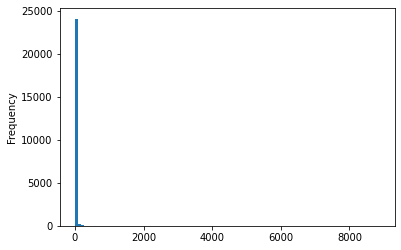

In [108]:
df['dependency'].value_counts().plot.hist(bins=100)

In [110]:
# Use only dependencies which occur more then or equal to min_count
MIN_COUNT = 10
counts = df['dependency'].value_counts()
mask = df['dependency'].replace(counts)
df = df.loc[mask.ge(MIN_COUNT)]

In [115]:
print('Number of entries in dataset: {}'.format(df.shape[0]))
print('Number of packages with stated dependencies: {}'.format(df['package'].unique().shape[0]))
print('Number of unique dependencies: {}'.format(len(df['dependency'].unique())))

Number of entries in dataset: 210610
Number of packages with stated dependencies: 39616
Number of unique dependencies: 2232
